In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, log_loss

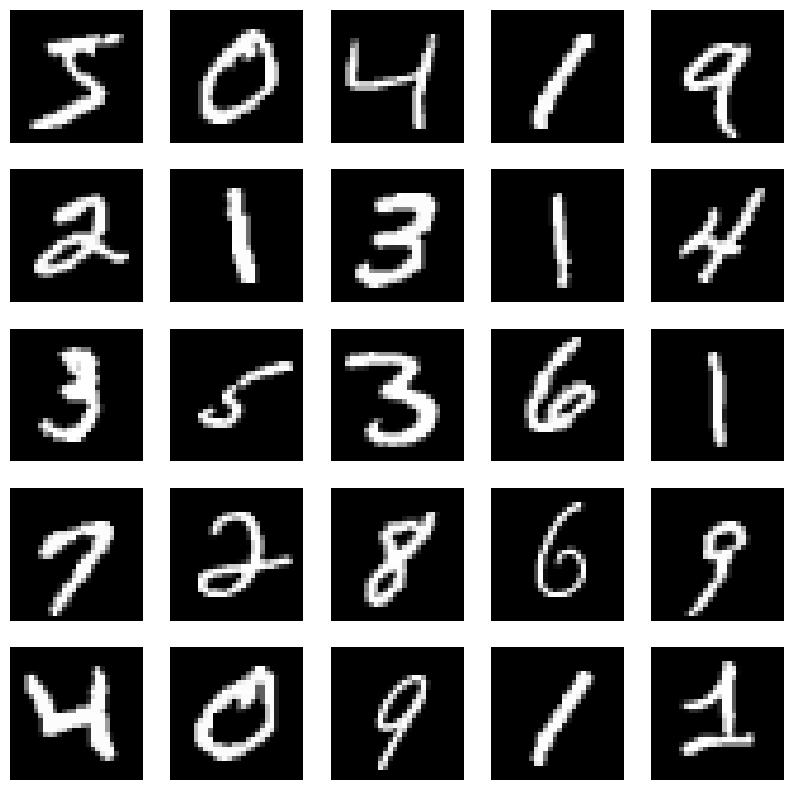

In [4]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
'''
In the MNIST dataset, each image is initially represented as a 2D array of shape (28, 28), 
where each element corresponds to a pixel intensity value.
However, CNN models expect the input to have a 3D shape that includes a channel dimension.
'''
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Visualize some examples from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')

plt.show()

In [7]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 31s 61ms/step - loss: 0.2247 - accuracy: 0.9336 - val_loss: 0.0717 - val_accuracy: 0.9779
Epoch 2/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0424 - val_accuracy: 0.9868
Epoch 3/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 4/10
469/469 [==============================] - 29s 61ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.0353 - val_accuracy: 0.9892
Epoch 5/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0349 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0324 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 29s 61ms/step - loss: 0.0175 - accuracy: 0.9946 - val_loss: 0.0283 - val_accuracy:

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 2s 8ms/step - loss: 0.0290 - accuracy: 0.9913
Test loss: 0.0290
Test accuracy: 0.9913


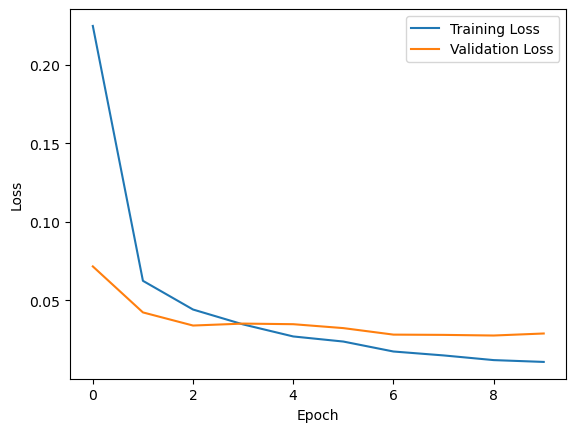

In [29]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate precision, recall, F1 score
print(classification_report(y_test_labels, y_pred))

# Calculate cross-entropy loss
loss = log_loss(y_test, y_pred_prob)
print('Cross-entropy loss:', loss)


313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Cross-entropy loss: 0.028979100359549637


1/1 [==============================] - 0s 60ms/step


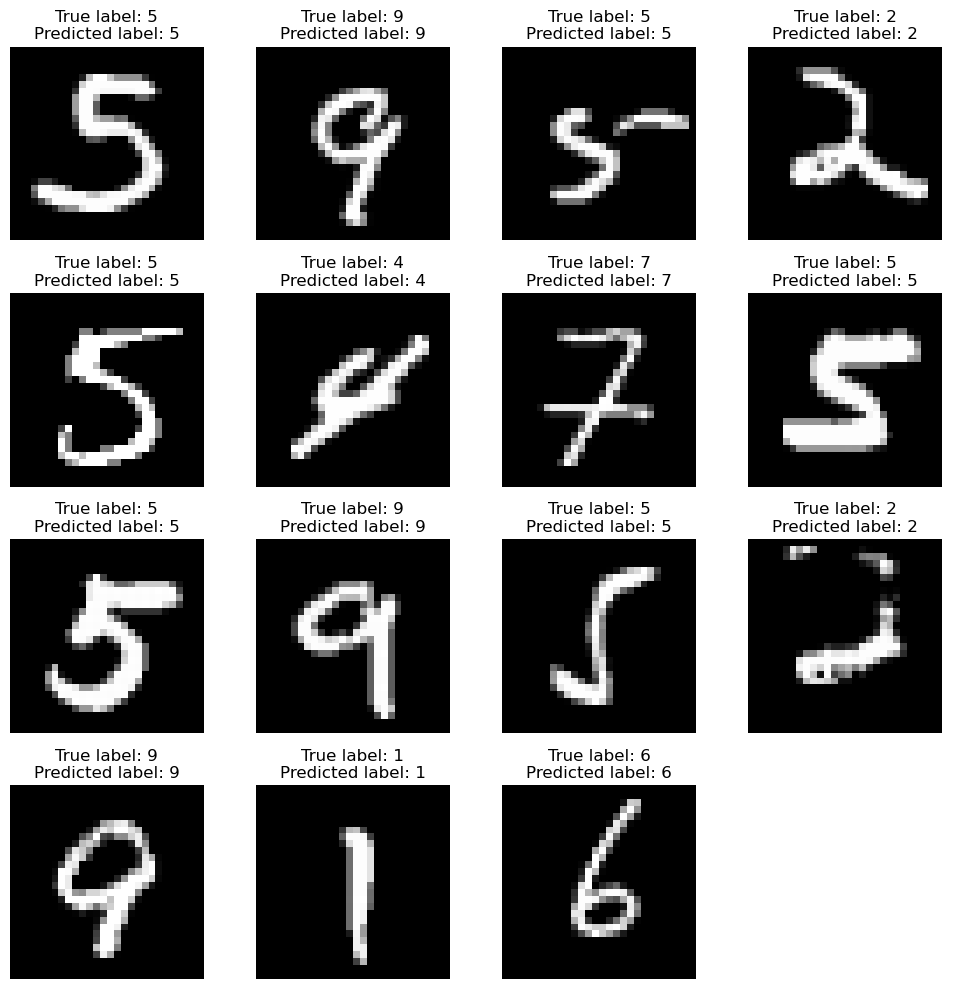

In [32]:
# Define the number of images to display
num_images = 15

# Compute the number of rows and columns in the grid
num_rows = int(np.ceil(np.sqrt(num_images)))
num_cols = int(np.ceil(num_images / num_rows))

# Create a figure with the appropriate number of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

# Loop over the specified number of random test images
for i in range(num_images):
    index = np.random.randint(X_test.shape[0])
    image = X_test[index].reshape((28, 28))
    true_label = np.argmax(y_test[index])
    predicted_label = np.argmax(model.predict(X_test[index:index+1]))

    # Calculate the subplot index
    row = i // num_cols
    col = i % num_cols

    # Plot the image with the true and predicted labels
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'True label: {true_label}\nPredicted label: {predicted_label}')
    axes[row, col].axis('off')

# Remove any remaining empty subplots
if num_images < num_rows * num_cols:
    for i in range(num_images, num_rows * num_cols):
        axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()